# Abandono de empleados
proyecto de Análisis de Datos y ML para abandono de empleados

**Setup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## carga de los datos

In [2]:
df = pd.read_csv('AbandonoEmpleados.csv', sep= ';',index_col='id', na_values='#N/D')

In [3]:
df.head(2)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7


## Business Analytics

In [4]:
#informacion general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

### Analisis de datos Nulos

In [5]:
df.isnull().sum().sort_values(ascending = False)[:6]

anos_en_puesto          1238
conciliacion            1011
sexo                     199
educacion                101
satisfaccion_trabajo      76
implicacion               18
dtype: int64

**Conclusiones:**
- anos_en_puesto y conciliacion  tienen el mayor porcentaje de datos nulos por lo que se debe **Eliminar**
- Sexo, educacion, satisfaccio_trabajo, implicacion, **debemos indagar para imputarlas**

In [6]:
#Eliminar columnas
df.drop(['anos_en_puesto', 'conciliacion'], axis =1, inplace =True)

## EDA  
### VARIABLES CATEGORICAS

In [7]:
#funcion para graficar las variables categoricas
from math import ceil

def grafica_eda_cat(cat):
    filas = ceil(cat.shape[1]/2)
    
    #definir grafico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize = (16, filas*6))
    
    #aplanar el grafico 
    ax = ax.flat
    
    #bucle que va añadiendo las graficas
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.bar(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)

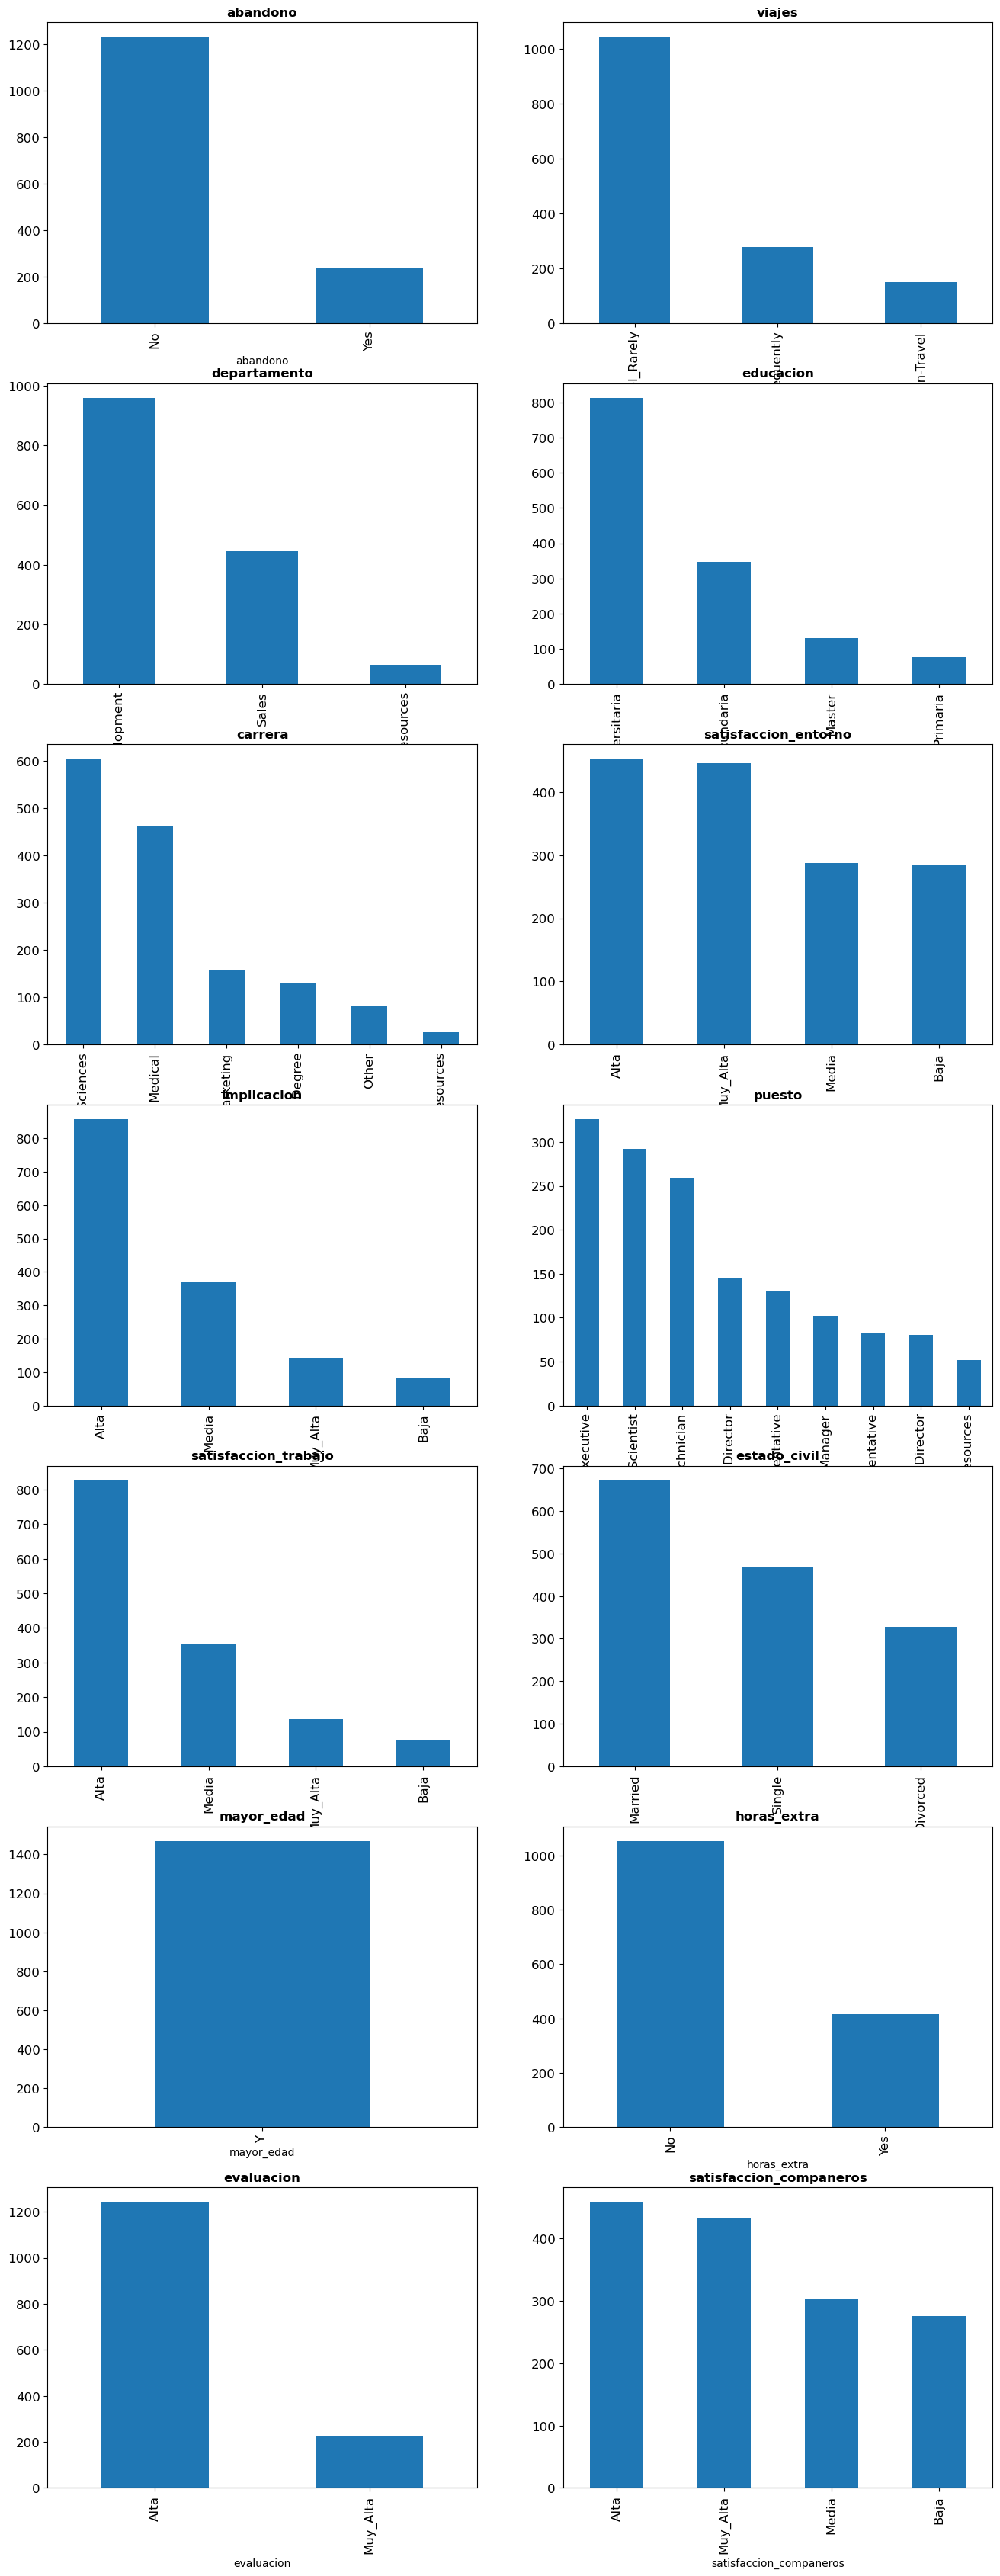

In [8]:
grafica_eda_cat(df.select_dtypes('O'))

**Conclusiones**


*   La variable mayor de edad solo tiene un valor-> eliminar la variable  

Sobre imputaciones pendientes en variables categoricas:


*   Educación: Universitaria
*   Satisfacion: Alta
*   Implicacion : Alta

In [9]:
#Eliminar Variables
df.drop('mayor_edad', axis = 1, inplace=True)

#### Imputar Variables

In [10]:
df['educacion'] = df['educacion'].fillna('universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')
df.head(2)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7


### VARIABLES NUMERICAS

In [11]:
#funcion para verificar la distribucion de las variables numerics
def grafica_eda_num(num):
    filas = ceil(num.shape[1]/2)
    
    #definir grafico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize = (16, filas*6))
    
    #aplanar el grafico 
    ax = ax.flat
    
    #bucle que va añadiendo las graficas
    for cada, variable in enumerate(num):
        
        num[variable].plot.hist(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)

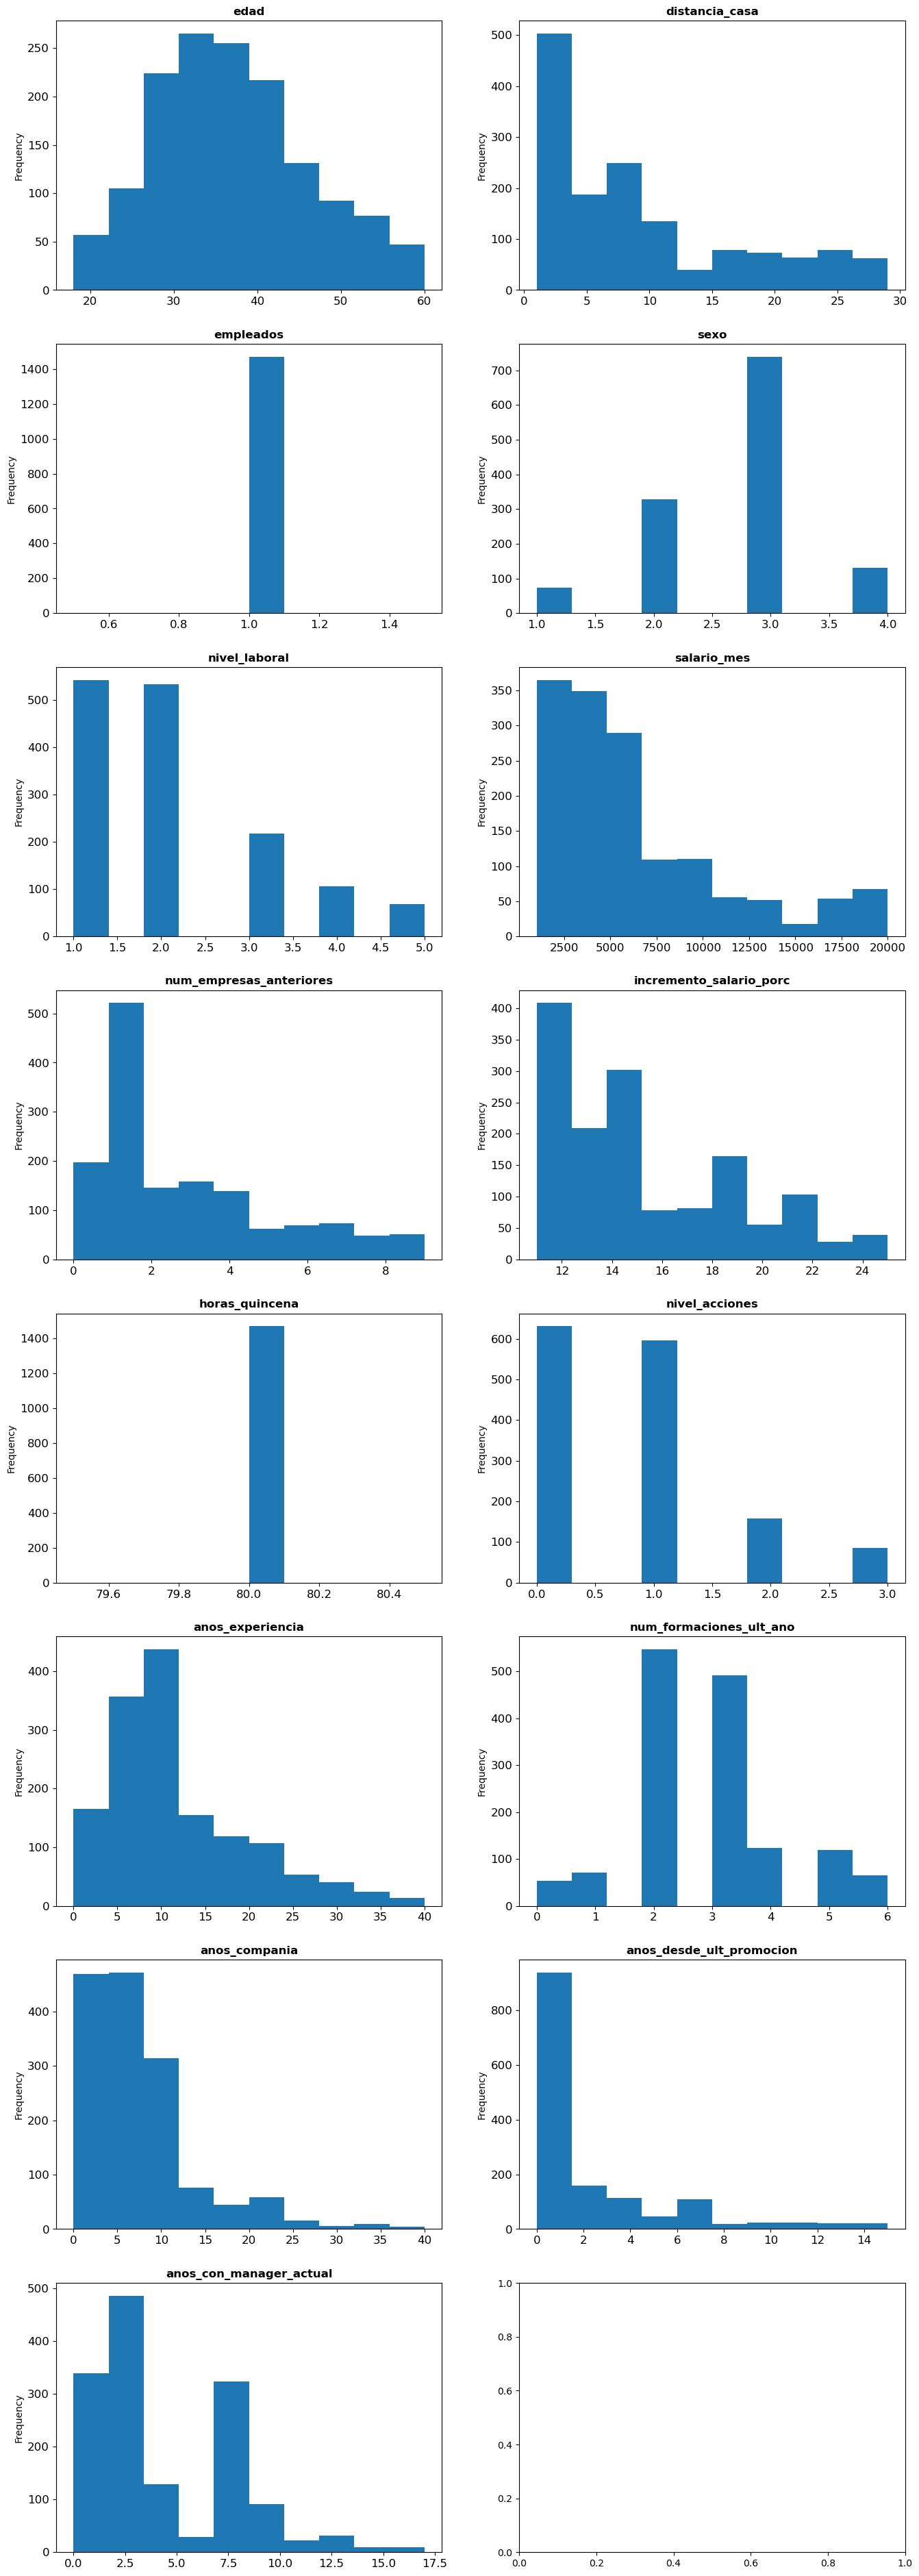

In [12]:
grafica_eda_num(df.select_dtypes('number'))

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0


**Conclusiones**

- empleados y horas por quincena poseen un solo valor(eliminar)
- Sexo tiene 4 valores (eliminar)  
Nota: de los datos nulos pendientes por imputar esta la variable Sexo pero será eliminada

In [14]:
df.drop(['sexo', 'empleados', 'horas_quincena'], axis = 1, inplace =True)

## Generar Insights

### Cuantificación del problema: Cual es la tasa de abandono

In [15]:
df['abandono'].value_counts(normalize=True)*100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

### Hay un perfil o tipo de empleados en específico

In [16]:
#Transformar la abandono a numerica
df['abandono'] = df['abandono'].map({'No':0, 'Yes':1})
df.abandono.unique()

array([1, 0], dtype=int64)

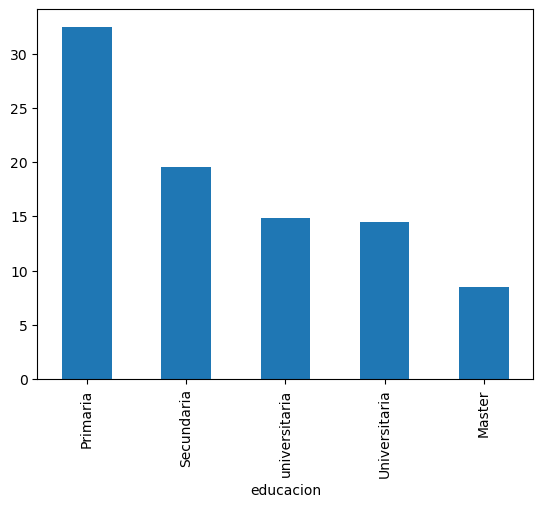

In [17]:
#educacion
temp = df.groupby('educacion')['abandono'].mean().sort_values(ascending = False) *100
temp.plot.bar();

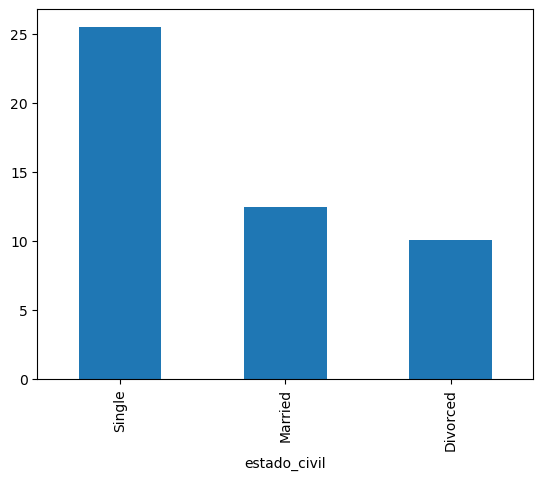

In [18]:
#estado civil
temp = df.groupby('estado_civil')['abandono'].mean().sort_values(ascending = False) *100
temp.plot.bar();

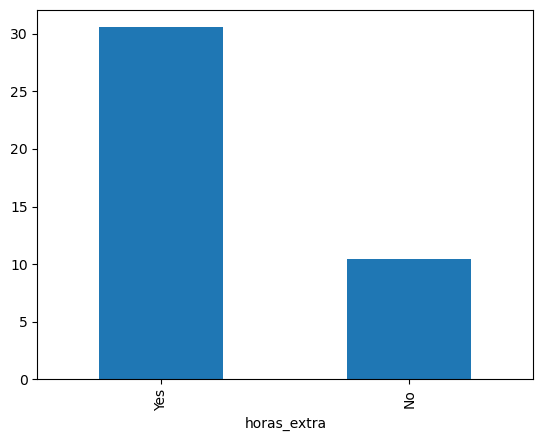

In [19]:
#horas extras
temp = df.groupby('horas_extra')['abandono'].mean().sort_values(ascending = False) *100
temp.plot.bar();

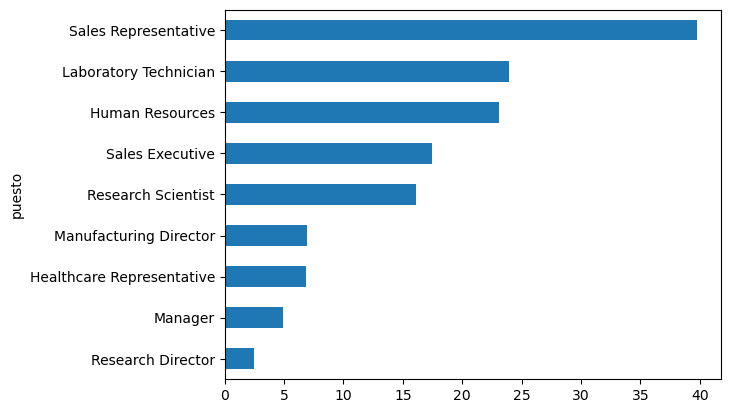

In [20]:
#por puesto
temp = df.groupby('puesto')['abandono'].mean().sort_values(ascending = True) *100
temp.plot.barh();

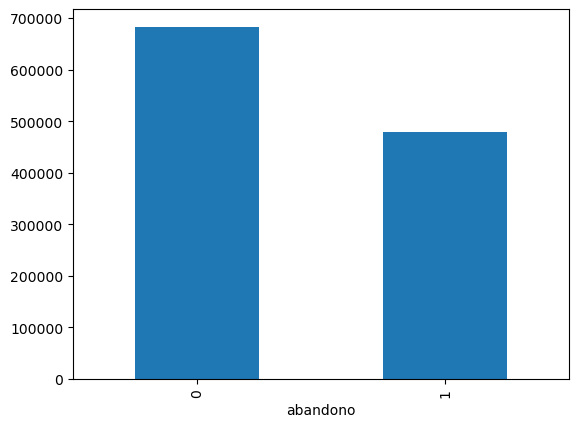

In [21]:
#salario por mes
temp = df.groupby('abandono')['salario_mes'].mean().sort_values(ascending = False) *100
temp.plot.bar();

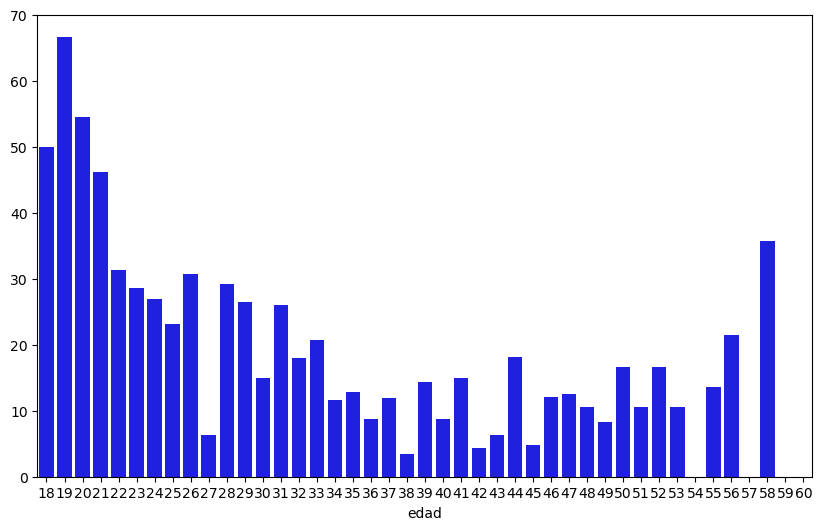

In [22]:
#Edad
temp = df.groupby('edad').abandono.mean() * 100

plt.figure(figsize = [10,6])
sns.barplot(x = temp.index,y= temp.values, color = 'blue')
plt.show()

**Clonclusiones**  
El perfil que deja la empresa es:

- bajo Nivel educativo
- soltero
- Promedio del Horas extras de 29(Altas horas Extras)
- Puesto de representantes de ventas
- salario promedio de 45 mil (Bajo salario)
- el rango de edad es de 18-21  
Nota: la tasa de abandono es de un 16.32%

### Cual es el impacto de este problema?  
Según el estudio "Cost of Turnover" del Center for American Progress:  

- El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

- El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

- El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

- El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [23]:
#creamos nueva variable salario_ano empleados
df['salario_ano'] = df['salario_mes'] * 12

In [24]:
#Calculamos el impacto economico de las empresa
# listar las condicones/ filtar por tipo de condicion el df
condiciones = [(df['salario_ano']<=30000),
                (df['salario_ano']>30000) & (df['salario_ano']<=50000),
                (df['salario_ano']>50000) & (df['salario_ano']<=75000),
                (df['salario_ano']>75000)]

resultados = [df.salario_ano *0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#aplicandolo las condiciones al resultado
df['impacto_abandono'] = np.select(condiciones, resultados, default=-999)
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352


### Cuanto nos ha costado este problema?

In [25]:
total_coste = df[df.abandono ==1]['impacto_abandono'].sum()
total_coste

2719005.912

### Cuanto nos cuesta que los empleados no esten motivados?  
(perdidas en implicación :Baja)

In [26]:
df[(df.abandono ==1) & (df['implicacion'] =='Baja')]['impacto_abandono'].sum()

368672.688

### Cuanto dinero prodriamos ahorrar fidelizando mejor a nuestros empleados

In [27]:
print('Reducir un 10% la fuga equivale a un ahorro de ${} cada año'.format(total_coste*0.1))
print('Reducir un 20% la fuga equivale a un ahorro de ${} cada año'.format(total_coste*0.2))
print('Reducir un 30% la fuga equivale a un ahorro de ${} cada año'.format(total_coste*0.3))

Reducir un 10% la fuga equivale a un ahorro de $271900.5912 cada año
Reducir un 20% la fuga equivale a un ahorro de $543801.1824 cada año
Reducir un 30% la fuga equivale a un ahorro de $815701.7736 cada año


### Y podemos seguir trazando estrategias asociadas a los insights de abandono:  
Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [28]:
total_repre_pasado = len(df[df['puesto']=='Sales Representative'])
abandono_repre_pasado = len(df[(df['puesto']=='Sales Representative') & (df['abandono']==1)])
porc_pasado = abandono_repre_pasado / total_repre_pasado
                            
porc_pasado

0.39759036144578314

#### Estimaremos cuantas se nos iran

In [29]:
total__repre_actual = len(df[(df['puesto']=='Sales Representative') & (df['abandono']==0)])
se_iran = total__repre_actual * porc_pasado
se_iran

19.879518072289155

#### Hipotesis: cuantos podriasmos retener.
- Suponemos un 30%

In [30]:
retenemos = se_iran * 0.30
empleados = df[(df['puesto']=='Sales Representative') & (df['abandono']==0)]['impacto_abandono'].sum()
ahorramos =  empleados *porc_pasado * 0.3

print('Podemos retener {} Sales Representative y nos ahorramos ${}'.format(retenemos, ahorramos))

Podemos retener 5.9638554216867465 Sales Representative y nos ahorramos $37447.22424578312


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.  

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

## Modelo de machine learning

In [31]:
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

In [32]:
#save data
df_ml.to_csv('datapreprocess.csv')

### Prepraración de los datos

In [33]:
#setup
from sklearn.preprocessing import OneHotEncoder

In [34]:
#Seleccionamos las variables categoricas
cat = df_ml.select_dtypes('O')

In [35]:
ohe = OneHotEncoder(sparse_output=False)

#entrenamiento y transformacion
cat_ohe = ohe.fit_transform(cat)

#Colocar el nombre a cada columa
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop = True)
cat_ohe.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Df final

In [36]:
num = df_ml.select_dtypes('number').reset_index(drop = True)
num.head(1)

,edad,abandono,distancia_casa,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,41,1,1,2,5993,8,11,0,8,0,6,0,5,71916,14670.864


In [37]:
df_ml = pd.concat([cat_ohe, num], axis =1)
df_ml.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352


## Separar los datos 
- Separar Variables
- dividir en train y test

In [38]:
# separar variables y target
X = df_ml.drop('abandono', axis = 1)
y = df_ml.abandono

In [39]:
#dividir en train and test
#setup 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelos

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [41]:
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt.fit(X_train, y_train) # entrenamiento del modelo

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### Predicción de la probabilidad

In [42]:
pred = dt.predict_proba(X_test)[:,1]
pred[:5]#imprimir los primero 5

array([0.06875   , 0.07751938, 1.        , 0.        , 0.58333333])

#### Evaluación

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
roc_auc_score(y_test, pred)

0.7160914581535808

### Interpretación

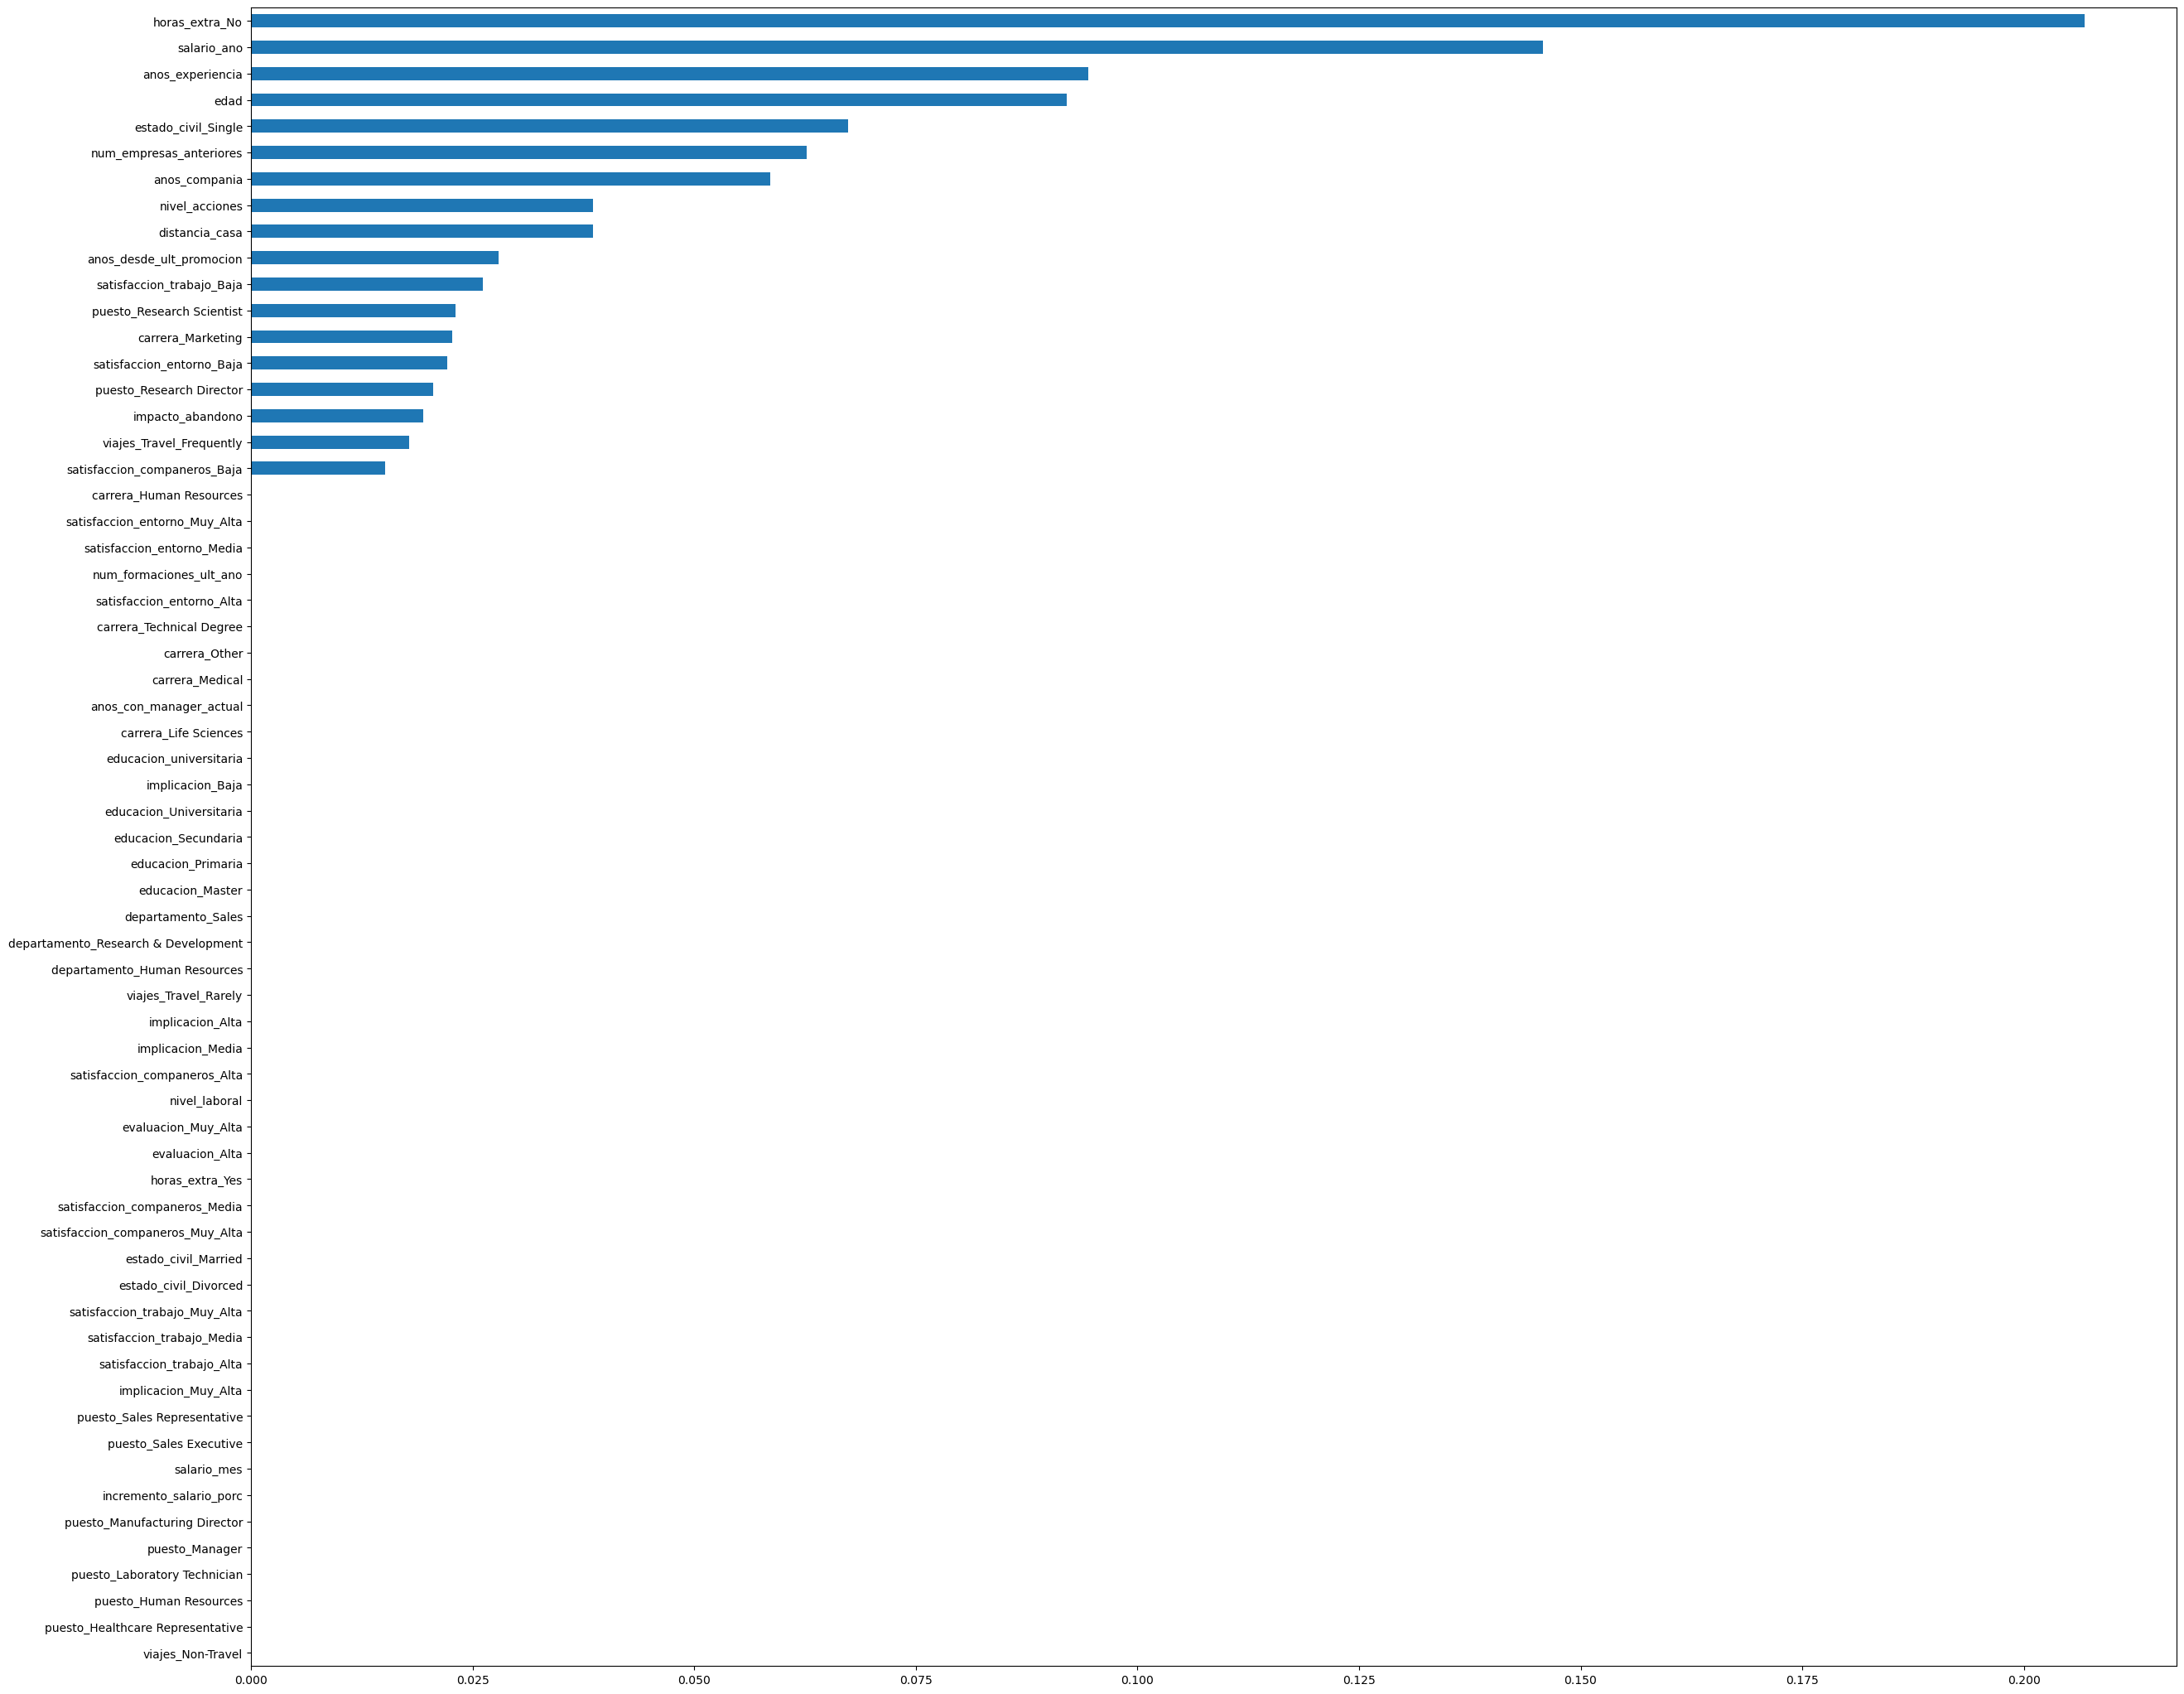

In [45]:
pd.Series(dt.feature_importances_, index= X_test.columns).sort_values(ascending = True).plot(kind ='barh', figsize = (30,26));

In [46]:
pd.Series(dt.feature_importances_, index= X_test.columns).sort_values(ascending = False).head(10)

horas_extra_No              0.206872
salario_ano                 0.145791
anos_experiencia            0.094419
edad                        0.092060
estado_civil_Single         0.067392
num_empresas_anteriores     0.062664
anos_compania               0.058607
nivel_acciones              0.038598
distancia_casa              0.038556
anos_desde_ult_promocion    0.027900
dtype: float64

## EXPLOTACION  
incorporar el scoring al df

In [47]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [48]:
df['score_abandono'] = dt.predict_proba(df_ml.drop(columns='abandono'))[:, 1]
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,score_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.288462
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.000000
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.750000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.130435
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.077519


#### Ejemplo: los 10 empleados con mayor score de abandono

In [49]:
df.sort_values(by ='score_abandono', ascending =False).head(10)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,score_abandono
id,,,,,,,,,,,,,,,,,,,,,
1489,34,1,Travel_Rarely,Sales,24,Secundaria,Medical,Baja,Media,2,...,Alta,0,16,2,15,10,10,55188,11258.352,1.0
1081,51,1,Travel_Rarely,Research & Development,4,Universitaria,Life Sciences,Baja,Alta,1,...,Alta,3,18,2,10,2,7,29532,4754.652,1.0
1108,33,1,Travel_Rarely,Research & Development,25,Secundaria,Medical,Baja,Media,1,...,Media,0,5,0,2,2,2,27756,4468.716,1.0
55,26,1,Travel_Rarely,Research & Development,25,universitaria,Life Sciences,Baja,Baja,1,...,Alta,0,1,2,1,0,1,27516,4430.076,1.0
881,35,1,Travel_Frequently,Research & Development,25,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Baja,1,10,3,10,7,8,24264,3906.504,1.0
1844,29,1,Travel_Rarely,Human Resources,13,Secundaria,Human Resources,Baja,Media,1,...,Muy_Alta,3,4,3,2,2,0,28020,4511.220,1.0
394,26,1,Travel_Rarely,Research & Development,16,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,5,2,3,0,2,28476,4584.636,1.0
1818,26,1,Travel_Rarely,Human Resources,20,Universitaria,Medical,Muy_Alta,Alta,1,...,Alta,0,6,3,5,1,4,25776,4149.936,1.0
1167,42,1,Travel_Frequently,Sales,12,Universitaria,Life Sciences,Alta,Alta,4,...,Media,0,22,2,21,13,14,165096,34670.160,1.0


**Ejemplo 2:** riesgo de dejar la empresa por puesto de trabajo

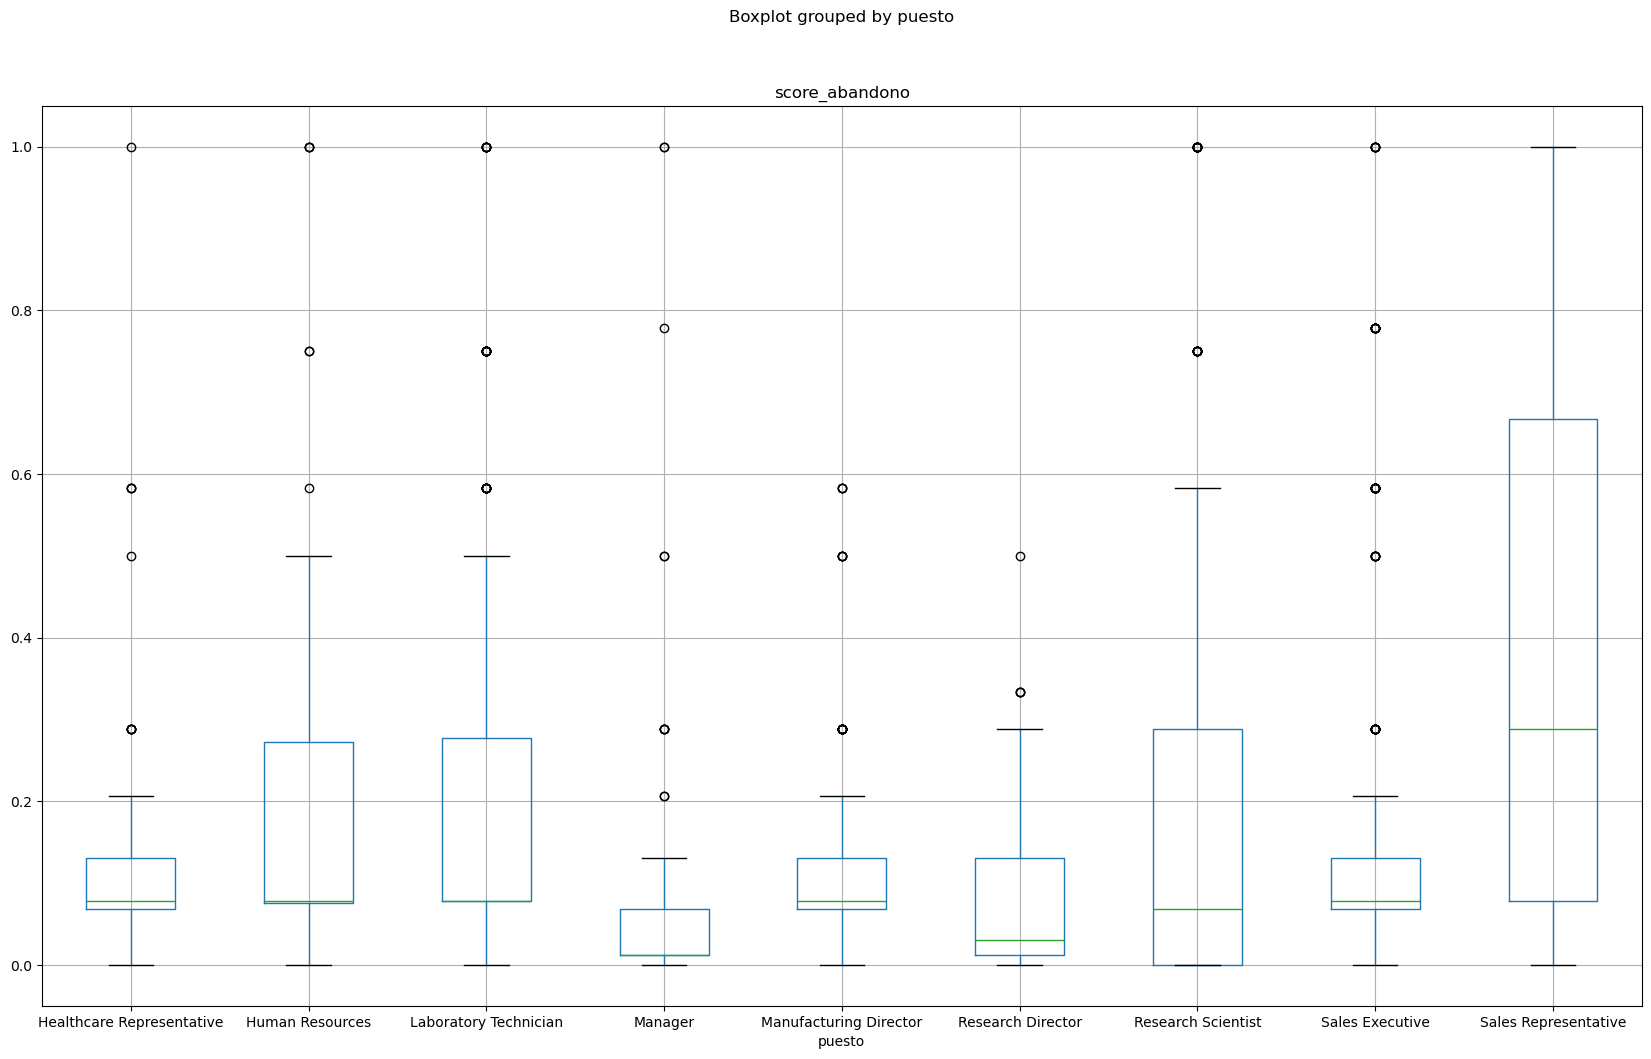

In [50]:
df.boxplot(column='score_abandono', by ='puesto', figsize = [20,12]);

#### Save el DF

In [51]:
df.to_excel('score_abandono.xlsx')

## Implementar con el modelo Entrenado con la ténica de Balanceo de datos

In [63]:
import joblib
from sklearn.ensemble import ExtraTreesClassifier

### Cargar modelo

In [64]:
modelo = joblib.load('trained_model.jl')

## Explotación Con modelo Entrenado BL-SMOTE

In [65]:
df['score_abandono_new'] = modelo.predict_proba(df_ml.drop(columns='abandono'))[:, 1]
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,score_abandono,score_abandono_new
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,0,8,0,6,0,5,71916,14670.864,0.288462,0.603441
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,1,10,3,10,1,7,61560,12558.240,0.000000,0.286331
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,7,3,0,0,0,25080,4037.880,0.750000,0.717739
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,8,3,8,3,0,34908,6876.876,0.130435,0.608275
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,1,6,3,2,2,2,41616,8198.352,0.077519,0.361558


#### chequeo de Resultados

In [66]:
#Filtrar datos los que no han abandonado
no_abandono = df[df['abandono']==0]
no_abandono.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,score_abandono,score_abandono_new
id,,,,,,,,,,,,,,,,,,,,,
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,1,10,3,10,1,7,61560,12558.240,0.000000,0.286331
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,8,3,8,3,0,34908,6876.876,0.130435,0.608275
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,1,6,3,2,2,2,41616,8198.352,0.077519,0.361558
8,32,0,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,8,2,7,3,6,36816,7252.752,0.068750,0.430942
10,59,0,Travel_Rarely,Research & Development,3,Master,Medical,Alta,Muy_Alta,1,...,3,12,3,1,0,0,32040,6311.880,0.130435,0.394892


In [85]:
no_abandono['Dif'] =round( (no_abandono['score_abandono_new'] - no_abandono['score_abandono']) * 100)

C:\Users\User\AppData\Local\Temp\ipykernel_10384\3201234930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_abandono['Dif'] =round( (no_abandono['score_abandono_new'] - no_abandono['score_abandono']) * 100)


In [86]:
no_abandono.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,score_abandono,score_abandono_new,Dif
id,,,,,,,,,,,,,,,,,,,,,
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,10,3,10,1,7,61560,12558.240,0.000000,0.286331,29.0
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,8,3,8,3,0,34908,6876.876,0.130435,0.608275,48.0
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,6,3,2,2,2,41616,8198.352,0.077519,0.361558,28.0
8,32,0,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,8,2,7,3,6,36816,7252.752,0.068750,0.430942,36.0
10,59,0,Travel_Rarely,Research & Development,3,Master,Medical,Alta,Muy_Alta,1,...,12,3,1,0,0,32040,6311.880,0.130435,0.394892,26.0


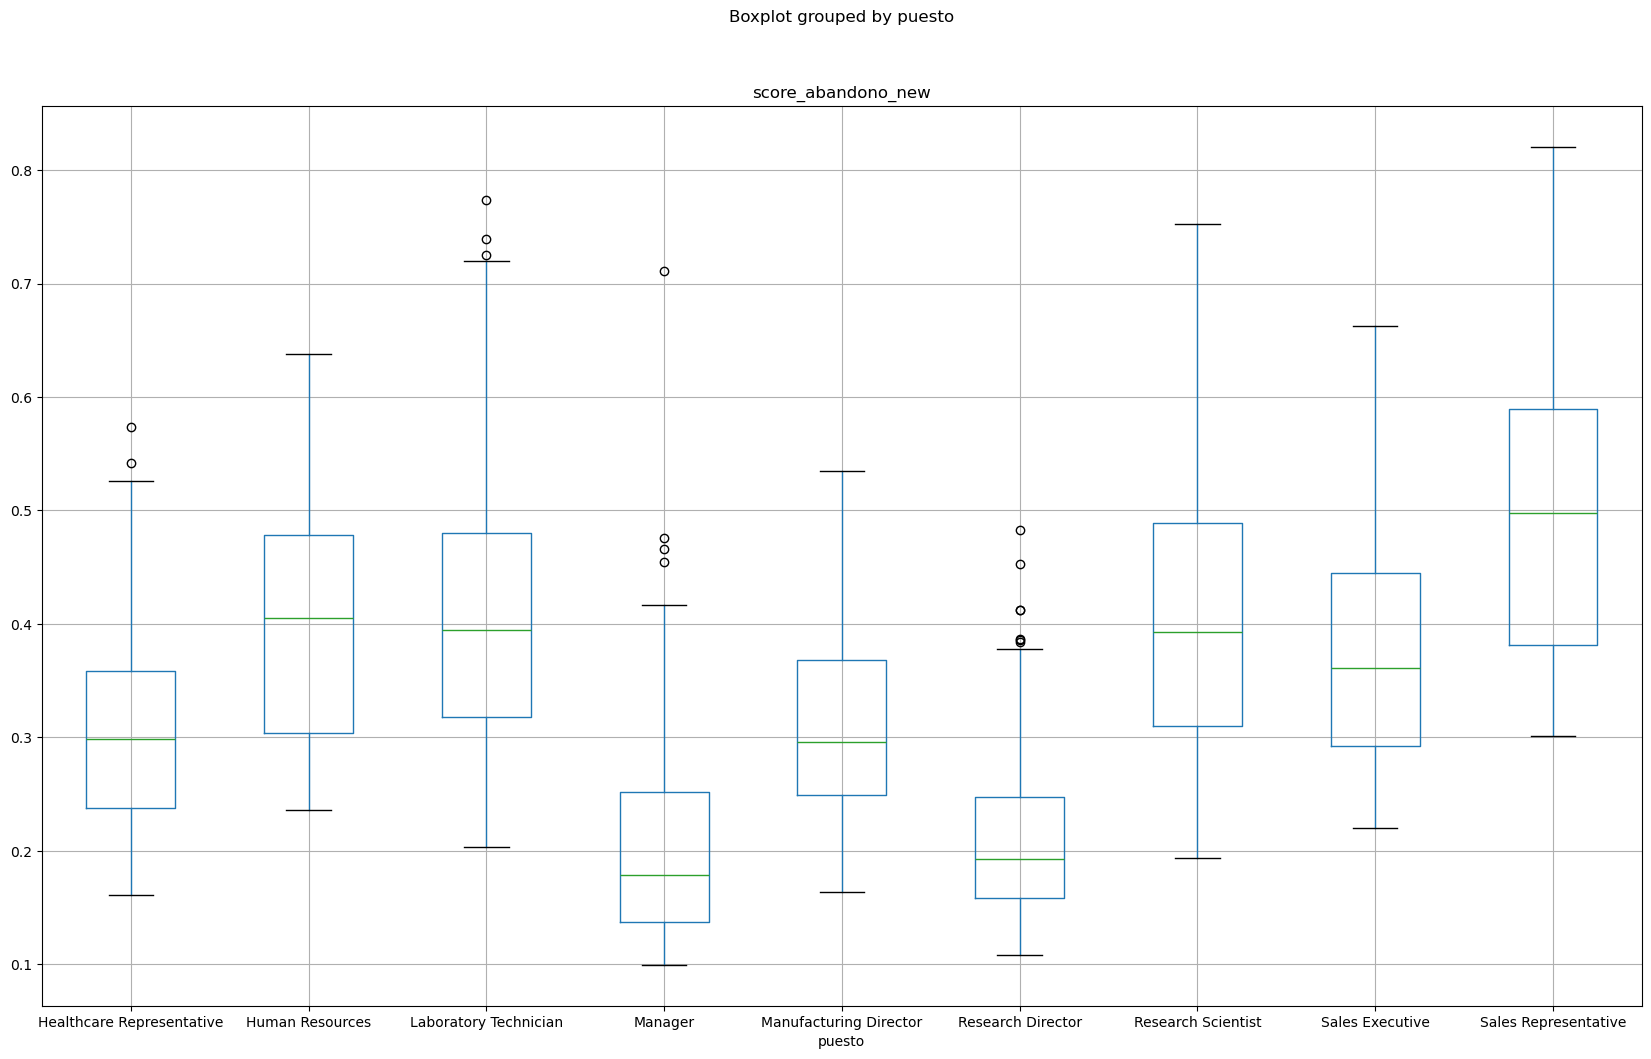

In [87]:
df.boxplot(column='score_abandono_new', by ='puesto', figsize = [20,12]);

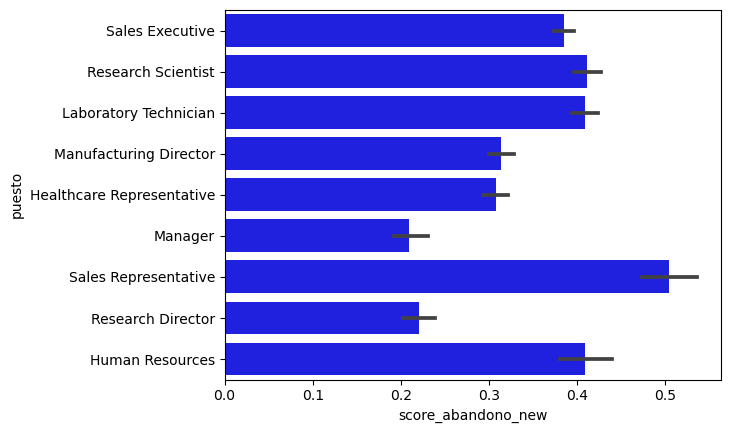

In [89]:
sns.barplot(data = df, x='score_abandono_new', y ='puesto', color = 'blue');